### 3.3 Filtrage

Dans la section précédente, vous avez vu comment afficher le contenu fréquentiel d'un signal. À présent, nous allons voir comment <i>concevoir des filtres</i> qui permettent de <i>modifier</i> ce contenu fréquentiel. En plus des librairies habituelles (`numpy` et `matplotlib.pyplot`), nous utiliserons également pour les exercices suivants :

In [2]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import signal
from scipy.io.wavfile import read
import random

**Exercice 3.13** Un filtre de Butterworth d'ordre 1 atténue un signal de 20 dB par décade. Écoutez un signal sinusoïdal de 440 Hz échantillonné à 2000 Hz. Grâce à la fonction `signal.butter`, concevez un filtre de Butterworth d'ordre 1 dont la fréquence de coupure est choisie pour obtenir une atténuation de -20 dB à 440 Hz. Filtrez le signal original grâce à la fonction `signal.filtfilt` et écoutez le signal filtré.

Lecture du signal original...
Lecture du signal filtré...


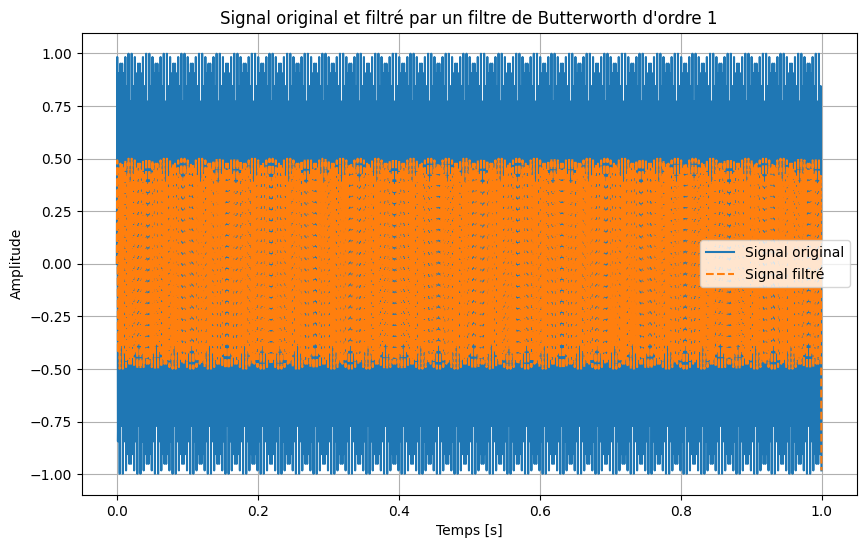

In [11]:
# Paramètres du signal
Fe = 2000  # Fréquence d'échantillonnage (2000 Hz)
Te = 1 / Fe
duree = 1  # Durée du signal (2 secondes)
f_sin = 440  # Fréquence du signal sinusoïdal (440 Hz)

# Génération du signal sinusoïdal
t = np.arange(0, duree, Te)
s = np.sin(2 * np.pi * f_sin * t)

# Écouter le signal original
print("Lecture du signal original...")
sd.play(s, Fe)
sd.wait()

# Conception du filtre de Butterworth d'ordre 1
# Fréquence de coupure choisie pour atténuer à -20 dB à 440 Hz
# On veut une atténuation de -20 dB à la fréquence 440 Hz, ce qui correspond à une réduction de 10^(-20/20).
wc = 440 / (Fe/2)  # Normalisation par rapport à la fréquence de Nyquist (Fe/2)
b, a = signal.butter(1, wc, btype='low')  # Filtre passe-bas d'ordre 1

# Filtrage du signal
s_filtre = signal.filtfilt(b, a, s)

# Écouter le signal filtré
print("Lecture du signal filtré...")
sd.play(s_filtre, Fe)
sd.wait()

# Visualisation des deux signaux pour comparaison
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Signal original')
plt.plot(t, s_filtre, label='Signal filtré', linestyle='--')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('Signal original et filtré par un filtre de Butterworth d\'ordre 1')
plt.legend()
plt.grid(True)
plt.show()

*Dans l'ex ci-dessus :*

- Nous faisons une **atténuation** de la fréquence de 440Hz sur notre signal de -20dB. On créer en fait un **filtre** de `Butterworh 'passe-bas' d'ordre 1`
- Nous affichons et écoutons le résultat.

**Théorie :**
- Filtre de `Butterworth` : Ce type de filtre est un type de filtre 'passe-bas', 'passe-haut','passe-bande' ou 'coupe-bande'. Il est conçu pour avoir une réponse en fréquences aussi plate que possible dans la bande passante. Ce qui veut dire qu'il ne présente pas de variations (ou "ripple") dans la bande passante, ce qui le rend idéal pour les applications où l'on souhaite préserver l'amplitude du signal d'entrée.

- `Ordre` d'un Filtre : L'ordre d'un filtre de Butterworth détermine la pente de la coupure autour de la fréquence de coupure, qui est la fréquence à partir de laquelle le filtre commence à atténuer le signal. Plus l'ordre est élevé, plus la pente est raide, ce qui signifie une transition plus nette entre les bandes passante et atténuée. 

*Ex : Un filtre de Butterworth de **1er ordre** a une pente de `-20 dB/décade`, ce qui signifie que l'atténuation augmente de 20 dB pour chaque facteur 10 en fréquence après la fréquence de coupure. Un filtre de **2e ordre** a une pente de `-40 dB/décade`, et ainsi de suite.*

- Fréquence de `Nyquist` : La `fréquence de Nyquist` est la **moitié** de la fréquence d'échantillonnage d'un système numérique. Elle représente la fréquence **maximale** à laquelle un signal peut être correctement échantillonné sans causer de repliement de spectre (aliasing). 

*Ex : Si l'on échantillonne un signal à 1000 Hz, la fréquence de Nyquist est de 500 Hz. Cela signifie que tout signal avec une fréquence supérieure à 500 Hz sera mal représenté et provoquera des interférences dans le spectre si aucun filtre passe-bas n'est appliqué avant l'échantillonnage.*

(Dans le cas présent on atténue le signal de 440Hz qui est pure donc une atténuation du son global car il n'y a qu'une seule fréquence)

**Exercice 3.14** En écoutant le son `alien_bruit1.wav`, on remarque que la chanson contient un bruit parasite dont on aimerait se débarrasser.

- Isolez la chanson de manière à ne pas déformer les voix lors du filtrage.
- Affichez le spectre de cette chanson bruitée et déduisez-en la fréquence du signal parasite.
- Créez un filtre (<i>e.g.</i>, un filtre de Butterworth d'ordre 2), appliquez-le au son corrompu et écoutez le résultat.
- Reconstituez le son entier avec la partie contenant le bruit atténué.

Faites de même avec le son `alien_bruit2.wav` (attention, il pourrait y avoir plusieurs fréquences parasites).

**Exercice 3.15** Reprenez le signal de l'exercice 2.7. Est-il possible de le filtrer pour supprimer le battement ? Même question pour le signal de l'exercice 2.8. 

**Exercice 3.16** Créez une suite de notes allant du La de la troisième octave au La de la neuvième octave. Vous aurez sept notes. Choisissez la fréquence d'échantillonnage $F_e = 8000$ Hz.

- Écoutez le résultat et visualisez le spectre du nouveau signal.
- Identifiez les fréquences que vous allez réellement entendre.
- Vérifiez si votre prédiction est correcte.
- Filtrez le signal pour éviter la présence de fréquences fantômes.

**Exercice 3.17** Filtrez le signal `tarzan.wav` au moyen d'un filtre de Butterworth passe-bas, d'ordre 2 et de fréquence de coupure $F_c=1000$ Hz en utilisant les fonctions `signal.butter` et `signal.filtfilt`. Utilisez ensuite les fonctions `fft.fftfreq` et `fft.fft` pour visualiser le spectre avant et après filtrage, comme cela a été fait à la section 3.2.1.

**Exercice 3.18** Importez le signal `tarzan.wav`.

- Utilisez les fonctions `signal.spectrogram` et `plt.pcolormesh` pour visualiser l'évolution de son spectre au cours du temps.
- Créez un signal qui est la somme d'un sinus de 440 Hz et d'un sinus de 800 Hz et qui a le même nombre d'échantillons que le signal sonore. C'est un bruit parasite.
- Créez un signal qui est la superposition du signal d'origine et du bruit parasite. Nous l'appelons « signal bruité ».
- Visualisez l'évolution de son spectre au cours du temps au moyen d'un spectrogramme.
- Réalisez un filtre qui atténue le bruit uniquement sur la partie bruitée. Sauvez ce résultat dans un nouveau fichier `.wav`.